In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the paths to the training and testing directories
train_path = "seg_train/seg_train"
test_path = "seg_test/seg_test"

# Define constants for image processing
# Define image size, batch size, seed, number of epochs, and learning rate
IMAGE_SIZE = (150,150)
BATCH_SIZE = 32
SEED = 123
EPOCH=40
LEARNING_RATE=0.0001

# Load the training dataset with data augmentation
train_set = tf.keras.utils.image_dataset_from_directory(
    train_path, 
    validation_split = 0.2,
    labels='inferred',
    label_mode='int',
    subset='training',
    seed =SEED, 
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE)

# Load the validation dataset
# Load the training dataset with validation split
validate_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2,
    labels='inferred',
    label_mode='int',
    subset='validation',
    seed = SEED,
    image_size= IMAGE_SIZE,
    batch_size = BATCH_SIZE)

# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle= False,
    labels='inferred',
    label_mode='int',
    image_size= IMAGE_SIZE)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


In [3]:
# Create a Sequential model
model=tf.keras.Sequential([
    # Rescale pixel values to [0,1]
    tf.keras.layers.Rescaling(1./255, input_shape=(150,150,3)),
    # First convolutional layer with 128 filters, each of size 3x3
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    # Max pooling layer with pool size 2x2
    tf.keras.layers.MaxPool2D(2,2),
    # Second convolutional layer with 64 filters, each of size 3x3
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    # Max pooling layer with pool size 2x2
    tf.keras.layers.MaxPool2D(2,2),
     # Third convolutional layer with 32 filters, each of size 3x3
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    # Max pooling layer with pool size 2x2
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten layer to convert 2D feature maps into a 1D feature vector
    tf.keras.layers.Flatten(),
    # Fully connected layer with 1024 neurons and ReLU activation function
    tf.keras.layers.Dense(1024, activation='relu'),
    # Dropout layer to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training
    tf.keras.layers.Dropout(0.4),
    # Fully connected layer with 128 neurons and ReLU activation function
    tf.keras.layers.Dense(128, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.4),
    # Output layer with 6 neurons and softmax activation function for multiclass classification
    tf.keras.layers.Dense(6, activation ='softmax')
    
])
# Display model summary
model.summary()# Save model architecture diagram as a PNG image
keras.utils.plot_model(model, '/kaggle/working/model.png', show_shapes=True, show_layer_names=True)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     9,470,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,698,790 (37.00 MB)

 Trainable params: 9,698,790 (37.00 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [4]:
# Compile the model with Adam optimizer and SparseCategoricalCrossentropy loss function
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

# Train the model on the training set and validate on the validation set for a specified number of epochs
# Store the training history in 'pre' variable for later analysis
pre = model.fit(
    train_set,
    validation_data=validate_set,
    epochs=EPOCH)

Epoch 1/40


351/351 ━━━━━━━━━━━━━━━━━━━━ 239s 675ms/step - accuracy: 0.4376 - loss: 1.3996 - val_accuracy: 0.6785 - val_loss: 0.8934
Epoch 2/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 230s 656ms/step - accuracy: 0.6410 - loss: 0.9374 - val_accuracy: 0.6957 - val_loss: 0.8155
Epoch 3/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 229s 653ms/step - accuracy: 0.7076 - loss: 0.7962 - val_accuracy: 0.7762 - val_loss: 0.6552
Epoch 4/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 229s 653ms/step - accuracy: 0.7530 - loss: 0.6856 - val_accuracy: 0.7783 - val_loss: 0.6057
Epoch 5/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 229s 652ms/step - accuracy: 0.7826 - loss: 0.6202 - val_accuracy: 0.8033 - val_loss: 0.5477
Epoch 6/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 229s 652ms/step - accuracy: 0.8071 - loss: 0.5687 - val_accuracy: 0.8068 - val_loss: 0.5395
Epoch 7/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 228s 650ms/step - accuracy: 0.8212 - loss: 0.5047 - val_accuracy: 0.8257 - val_loss: 0.4829
Epoch 8/40
351/351 ━━━━━━━━━━━━━━━━━━━━ 228s 650ms/step - accuracy: 0.8426 - loss: 0.46

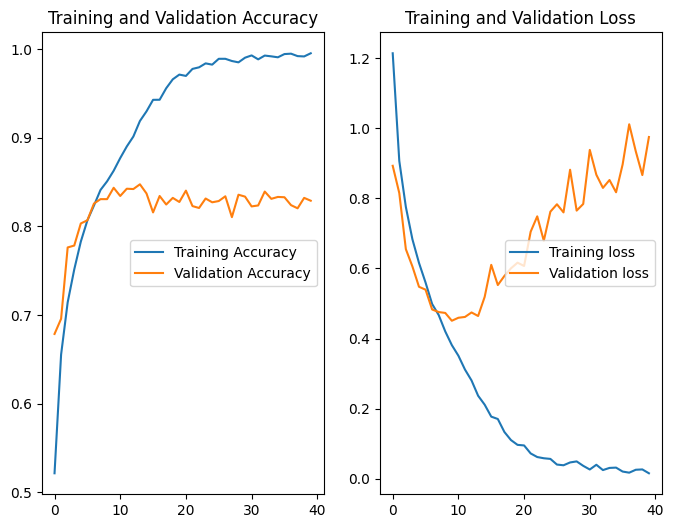

In [6]:
# Extracting accuracy and loss values from training history
acc = pre.history['accuracy']
val_acc = pre.history['val_accuracy']

loss = pre.history['loss']
val_loss = pre.history['val_loss']

# Range of epochs
epoch_range = range(EPOCH)

# Plotting training and validation accuracy
plt.figure(figsize= (8,6))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label = 'Validation loss')
plt.legend(loc='center right')
plt.title('Training and Validation Loss')

plt.show()

In [7]:
# Evaluate the trained model on the test set to assess its performance

# `model.evaluate()` function computes the loss value and metrics for the test dataset
# The loss value represents the error between the true labels and the predicted labels
# The metrics typically include accuracy, but this can be customized based on the model's configuration

# Parameters:
# `test_set`: The test dataset on which the model will be evaluated

# Returns:
# `model_loss`: The loss value calculated by the model on the test dataset
# `model_accuracy`: The accuracy of the model on the test dataset

model_loss, model_accuracy = model.evaluate(test_set)

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.8246 - loss: 1.0100


In [8]:
# Evaluate the model on the test set to compute loss and accuracy
y_pre = model.predict(test_set)

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step


[(2825, 0.5414385), (2840, 0.5414385), (2881, 0.5414385), (2906, 0.5414385), (2956, 0.5414385)]
2824
2825
2840
2881
2906
2956


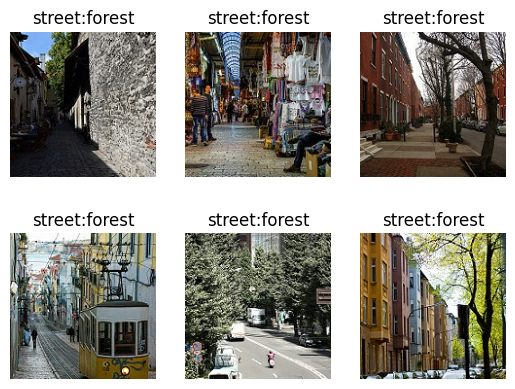

In [9]:
y_class = np.argmax(y_pre, axis=1)

#dataset = test_set.enumerate()
y_groundTru=[]
for elem in test_set:#.as_numpy_enumerate():
#for image, label in test_set:
    y_groundTru += elem[1].numpy().tolist()

def compare_list(list1, list2):
    diff=[]
    for i, (x, y) in enumerate(zip(list1, list2)):
        if x != y:
            diff.append(i)
    
    return diff

error_pos = compare_list(y_class, y_groundTru)
err_prob = {}
i = 0
while i< len(y_class):
    if y_class[i] != y_groundTru[i]:
        err_prob[i] = y_pre[y_class[i]].max()
    i += 1
    
err_prob_sorted = sorted(err_prob.items(), key=lambda x:x[1],reverse=True)
print(err_prob_sorted[-5:])

def get_label(num):
    match num:
        case 0:
            return 'buildings'
        case 1:
            return 'forest'
        case 2:
            return 'glacier'
        case 3:
            return 'mountain'
        case 4:
            return 'sea'
        case 5:
            return 'street'
    return 'undefine'

#get the batch data
def get_data(i):
    batchs = i/32
    index = i%32
    b = 0
    it = iter(test_set)
    while b<=batchs:
        b += 1
        images, labels=next(it)
    return images,labels,index

n=0
for x in err_prob_sorted[-6:]:
    print(x[0])
    images, labels, index = get_data(x[0])
    plt.subplot(2,3,n+1)
    plt.imshow(images[index].numpy().astype(np.uint8))
    plt.title(get_label(labels[index])+':'+get_label(y_class[x[0]]))
    plt.axis('off')
    n+=1
plt.show()

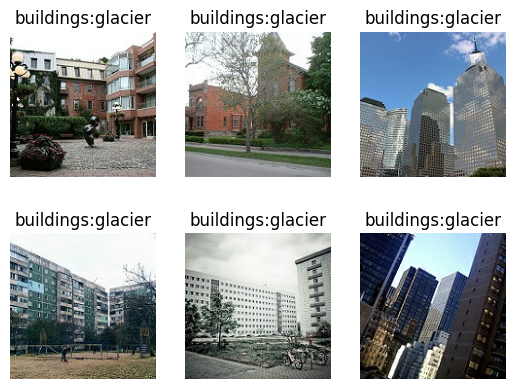

In [10]:
n=0
# Iterate over the sorted error probabilities of the first 6 instances
for v in err_prob_sorted[0:6]:
    # Get the corresponding image, label, and index
    images, labels, index = get_data(v[0])
    # Create subplots for visualization
    plt.subplot(2,3,n+1)
    # Display the image
    plt.imshow(images[index].numpy().astype(np.uint8))
    # Set the title with the true label and predicted label
    plt.title(get_label(labels[index])+':'+get_label(y_class[v[0]]))
    # Turn off axis
    plt.axis('off')
    n+=1# Increment the counter
plt.show()